In [16]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [3]:
df = pd.read_csv("train.csv")

In [4]:
len(df)

42000

In [10]:
# 1 represents real, 0 fake
df['label'] = 1

In [5]:
X_discriminator = df.drop('label', axis=1)
y_discriminator = df['label']

In [6]:
pixel_columns = df.shape[1] - 1  # subtracting 1 for the label column

image_side_length = int(pixel_columns**0.5)
print(f"Each image is {image_side_length}x{image_side_length} pixels.")

Each image is 28x28 pixels.


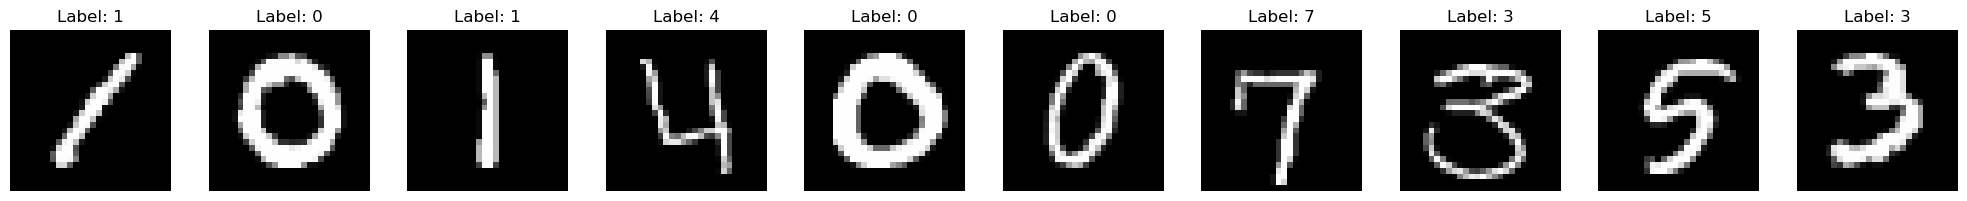

In [8]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))  
for i, ax in enumerate(axes):
    # Reshape each row into 28x28 array and plot
    img = X.iloc[i].to_numpy().reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [9]:
X_discriminator = X_discriminator.values.reshape(-1, 1, 28, 28)

In [13]:
X_discriminator = torch.tensor(X_discriminator).float() / 255.0

In [ ]:
dataset_discriminator = TensorDataset(X_discriminator, y_discriminator)
loader_discriminator = DataLoader(dataset_discriminator, batch_size=32, shuffle=True)

In [ ]:
num_samples = X_discriminator.shape[0]  # Number of real images
noise_dim = 100  # Dimensionality of the noise vector

# Generate noise samples from a normal distribution
noise = torch.randn(num_samples, noise_dim)
noise_dataset = TensorDataset(noise)
noise_loader = DataLoader(noise_dataset, batch_size=32, shuffle=True)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, stride=1, padding=1)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=64, stride=1, padding=1)
        
        self.conv6 = nn.Conv2d(in_channels=64, out_channels=128, stride=1, padding=1)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(in_features=128*7*7, out_features=1)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(F.relu(self.conv5(x)))

        x = F.relu(self.conv6(x))
        print(x.shape)
        x = x.view(-1, 128*7*7)
        x = self.dropout(x)
        print(x.shape)
        x = self.fc(x)
        return torch.sigmoid(x)

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc = nn.Linear(in_features=100, out_features=100)
        self.conv1 = nn.Conv2d(in_channels=10, out_channels=128)
        self.conv2 = 